In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

class BayesianNetwork:
    def __init__(self):
        # Directed graph for BN
        self.graph = nx.DiGraph()

    def add_variable(self, variable_name):
        """
        Adds a new variable (node) to the Bayesian Network.
        """
        self.graph.add_node(variable_name, probability=None)
        self.graph.nodes[variable_name]["proba_table"] = dict()

    def add_edge(self, parent, child):
        """
        Adds an edge between two variables indicating causal relationship.
        """
        self.graph.add_edge(parent, child)
    
    def __getitem__(self, key):
        return self.graph.nodes[key]["proba_table"]

    def set_probability(self, variable_name, probability):
        """
        Sets the probability for a particular variable.
        Currently, this is a placeholder and works for single probabilities.
        In real-world scenarios, you'll have to use Conditional Probability Tables (CPT).
        """
        self.graph.nodes[variable_name]['probability'] = probability
    
    def set_conditional_probability(self, child, value, parent_values, proba):
        """Sets conditional probability table for a RV

        My value, given parent values ... = just store as tuple for parents...

        Args:
            child (str): Name of the RV
            value (Any): value of the RV
            parent_values (dict): Dictionary of parent values
            proba (float): Conditional probability
        """
        proba_table = self[child]
        if value not in proba_table:
            proba_table[value] = dict()
        parents = self.graph.predecessors(child)
        assert set(parents) == set(parent_values)
        key = tuple([parent_values[parent] for parent in sorted(list(parent_values))])
        print(f"Setting P({child}={value}|{sorted(list(parent_values))}={key}) = {proba}")
        proba_table[value][key] = proba
        self.graph.nodes[child]["proba_table"][value] 
    
    def query(self, variable, evidence: dict):
        return 1.0

    def visualize(self):
        """
        Visualizes the Bayesian Network using NetworkX and Matplotlib.
        """
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_size=2000, node_color='skyblue')
        plt.title("Bayesian Network")
        plt.show()


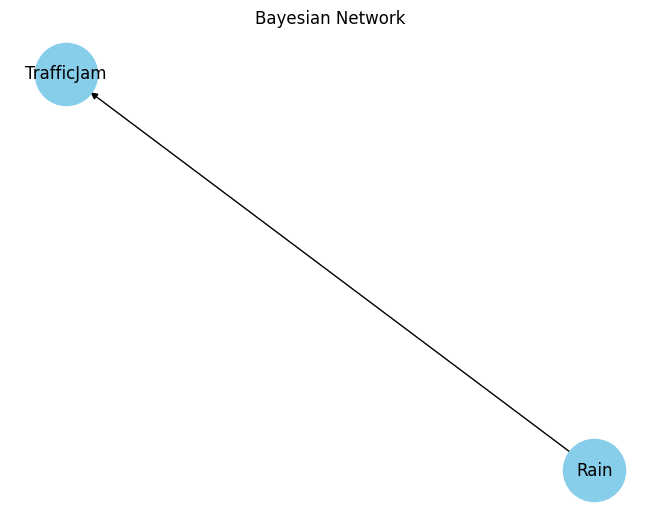

In [6]:

bn = BayesianNetwork()
bn.add_variable('Rain')
bn.add_variable('TrafficJam')
bn.add_edge('Rain', 'TrafficJam')
bn.set_probability('Rain', 0.3)
bn.visualize()


In [12]:
bn = BayesianNetwork()

# Add variables/nodes
bn.add_variable('Cloudy')
bn.add_variable('Rain')
bn.add_variable('TrafficJam')

# Add causal relationships/edges
bn.add_edge('Cloudy', 'Rain')
bn.add_edge('Cloudy', 'TrafficJam')
bn.add_edge('Rain', 'TrafficJam')

# Set single probabilities
bn.set_probability('Cloudy', 0.5)  # P(Cloudy) = 0.5

# Set conditional probabilities with CPTs
# Notation: bn.set_conditional_probability(child, {parents}, probability)
bn.set_conditional_probability('Rain', True, {'Cloudy': True}, 0.8)   # P(Rain | Cloudy) = 0.8
bn.set_conditional_probability('Rain', True, {'Cloudy': False}, 0.2)  # P(Rain | ¬Cloudy) = 0.2

# Setting for TrafficJam, which has two parents
# For simplicity, let's assume traffic jams only occur when both Cloudy and Rain conditions are true
bn.set_conditional_probability('TrafficJam', True, {'Cloudy': True, 'Rain': True}, 0.9)
bn.set_conditional_probability('TrafficJam', True, {'Cloudy': True, 'Rain': False}, 0.5)
bn.set_conditional_probability('TrafficJam', True, {'Cloudy': False, 'Rain': True}, 0.6)
bn.set_conditional_probability('TrafficJam', True, {'Cloudy': False, 'Rain': False}, 0.1)

# Now, let's perform a query.
# Hypothetical usage for querying the network:
# bn.query(target_variable, evidence={...})
# The query method should return the probability distribution of the target variable given the evidence.

# For example: What's the probability of a TrafficJam given it's Cloudy and there's no Rain?
result = bn.query('TrafficJam', evidence={'Cloudy': True, 'Rain': False})
print(f"P(TrafficJam | Cloudy, ¬Rain) = {result}")


Setting P(Rain=True|['Cloudy']=(True,)) = 0.8
Setting P(Rain=True|['Cloudy']=(False,)) = 0.2
Setting P(TrafficJam=True|['Cloudy', 'Rain']=(True, True)) = 0.9
Setting P(TrafficJam=True|['Cloudy', 'Rain']=(True, False)) = 0.5
Setting P(TrafficJam=True|['Cloudy', 'Rain']=(False, True)) = 0.6
Setting P(TrafficJam=True|['Cloudy', 'Rain']=(False, False)) = 0.1
P(TrafficJam | Cloudy, ¬Rain) = 1.0


In [13]:
bn["TrafficJam"]

{True: {(True, True): 0.9,
  (True, False): 0.5,
  (False, True): 0.6,
  (False, False): 0.1}}